# SVR STEPS


## 1. IMPORT AND SPLIT DATA

In [8]:
import pandas as pd
import numpy as np
hitters=pd.read_csv("../input/hittlers/Hitters.csv")
df=hitters.copy()
df.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N


In [9]:
df=df.dropna()
y=df["Salary"]   # EASY ASSESMENT FOR "SALARY" AND "HITS" VARIABLES
dms=pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head(2)

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0


In [28]:
dms=dms[["League_N","Division_W","NewLeague_N"]]
a=df.drop(["Salary","League","Division","NewLeague"],axis=1)
X=pd.concat([a,dms],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

# EASY SVR
## NOW WE HAVE Y VARIABLE AND ONLY ONE X VARIABLE 

In [29]:
X_train=pd.DataFrame(X_train["Hits"])
X_test=pd.DataFrame(X_test["Hits"])

# 2.SET AND FIT SVR MODEL

In [30]:
from sklearn.svm import SVR
svr_model=SVR("linear").fit(X_train,y_train)

# 3.PREDICT Y FROM X TRAIN

In [31]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [32]:
print("y=",svr_model.intercept_[0],"+",svr_model.coef_[0][0],"x") #SVR PREDICTION MODEL

y= -48.69756097561513 + 4.969512195122093 x


In [33]:
svr_model.coef_[0]

array([4.9695122])

In [34]:
svr_model.coef_[0][0] # add one more square bracket to escape from array

4.969512195122093

In [35]:
X_train["Hits"][0:1]

183    91
Name: Hits, dtype: int64

In [36]:
-48.69756097561513+4.969512195122206*X_train["Hits"][0:1]   # What will be my salary if i score 91 points in a game? 
                                                            #403

183    403.528049
Name: Hits, dtype: float64

In [37]:
y_pred=svr_model.predict(X_train)

In [38]:
X_train.shape

(197, 1)

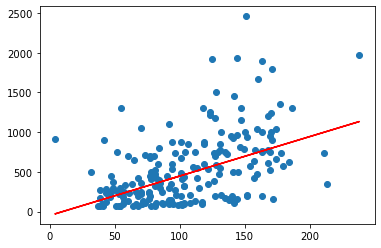

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred, color="r");   #SVR GRAPHIC 

In [40]:
#LINEAR REGRESSION FORMULA
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression().fit(X_train,y_train)
linear_predict=linear_model.predict(X_train)
print(linear_model.intercept_, "+",linear_model.coef_[0],"x")

-8.814095480334572 + 5.1724561354706875 x


In [41]:
-8.814095480334572+5.1724561354706875*X_train["Hits"][0:1]    # What will be my salary if i score 91 points in a game? 
                                                              #461

183    461.879413
Name: Hits, dtype: float64

In [42]:
#Linear Regression predict is 461, easy SVR model prediction is 403 for scoring 91 points

# COMPARISON BETWEEN LINEAR REGRESSION AND SVR MODEL

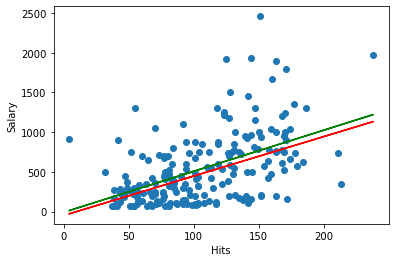

In [43]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred, color="r")
plt.plot(X_train, linear_model.predict(X_train), color="g")   #Linear Regression(green) and SVR model(red) are together
plt.xlabel("Hits")
plt.ylabel("Salary");

In [44]:
#WHY SVR IS LOWER THAN LINEAR REGRESSION? 
#BECAUSE SVR IS ROBUST, IT IS LESS SENSITIVE TO OUTLIERS THAN LINEAR REGRESSION !!

In [45]:
#IN BRIEFLY, PREDICTIONS ARE:

In [46]:
svr_model.predict([[91]])

array([403.52804878])

In [47]:
linear_model.predict([[91]])

array([461.87941285])

# TEST ERROR FOR UNTUNED SVR MODEL WHICH INCLUDED ONE X VARIABLE 

In [48]:
from sklearn.metrics import mean_squared_error    
np.sqrt(mean_squared_error(y_test,svr_model.predict(X_test)))      #test error without tunning

459.0187960365147

# 4.SVR MODEL TUNNING

In [49]:
svr_model       # we will tune "c" parameter in this model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
svr_params={"C": np.arange(0.1,2,0.1)}
from sklearn.model_selection import GridSearchCV
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)

In [51]:
svr_cv_model.best_params_

{'C': 0.1}

In [52]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

# 5.TEST ERROR FOR TUNED MODEL(INCLUDE ONE X VARIABLE)

In [53]:
svr_tuned_model=SVR("linear",C=pd.Series(svr_cv_model.best_params_)[0]).fit(X_train,y_train)
y_pred=svr_tuned_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

458.198966781116

# PLUS:  ASSESMENT FOR SALARY AND ALL VARİABLES IN X

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
hitters=pd.read_csv("../input/hittlers/Hitters.csv")
df = hitters.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)
svr_params={"C": np.arange(0.1,2,0.1)}
from sklearn.model_selection import GridSearchCV
svr_cv_model=GridSearchCV(svr_model,svr_params,cv=10).fit(X_train,y_train)   #it takes time (more than 15 minutes) 

In [56]:
svr_cv_model

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='linear',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
y_pred=svr_cv_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

367.5385297249052

In [ ]:
# BEFORE THIS TIME, WE HAD ONLY ONE X VARIABLE(HITS) AND WE PREDICTED THE SALARY
# NOW, WE HAVE MORE X VARIABLES. 
#AND WE KNOW THAT THESE VARIABLES ALSO HAVE POWER TO EXPLAIN VARIABILITY OF DEPENDENT VARIABLE
#BECAUSE TEST ERROR DECREASED FROM 458 TO 367

# THIS TEST ERROR IS ALSO LESS THAN THE TEST ERROR OF NONLINEAR REGRESSION MODEL KNN(THE PREVIOUS IPYNB)

In [58]:
#Thanks to https://github.com/mvahit/DSMLBC